# Data Science Project
## Analysis of the Young People Survey

Firstly, import needed libraries 

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

Import dataset

In [179]:
# data
df = pd.read_csv('./dataSet/responses.csv')
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [180]:
# explanation for the columns names
# see description.txt for details
df_columns = pd.read_csv('./dataSet/columns.csv')
df_columns.head()

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs
2,"Dance, Disco, Funk",Dance
3,Folk music,Folk
4,Country,Country


Check for empty columns:

In [181]:
for col in df.columns:
    if(np.sum(df[col].isnull()) != 0):
        print("Number of empty columns: ", np.sum(df[col].isnull()), ", column name: ", col)

Number of empty columns:  3 , column name:  Music
Number of empty columns:  2 , column name:  Slow songs or fast songs
Number of empty columns:  4 , column name:  Dance
Number of empty columns:  5 , column name:  Folk
Number of empty columns:  5 , column name:  Country
Number of empty columns:  7 , column name:  Classical music
Number of empty columns:  2 , column name:  Musical
Number of empty columns:  3 , column name:  Pop
Number of empty columns:  6 , column name:  Rock
Number of empty columns:  3 , column name:  Metal or Hardrock
Number of empty columns:  8 , column name:  Punk
Number of empty columns:  4 , column name:  Hiphop, Rap
Number of empty columns:  7 , column name:  Reggae, Ska
Number of empty columns:  6 , column name:  Swing, Jazz
Number of empty columns:  7 , column name:  Rock n roll
Number of empty columns:  7 , column name:  Alternative
Number of empty columns:  8 , column name:  Latino
Number of empty columns:  7 , column name:  Techno, Trance
Number of empty colu

# QUESTION 1 
## correlation analysis

### Are there any connections between:
### --> demographic data and spending habits 
### or
### --> between phobias and health habits ?

=============================================================

Find interesting correletion between two data subsets:
(One side: DEMOGRAPHICS)
(Another side: SPENDING HABITS) 
create two subsets for correlation analysis:

In [182]:
# first, chose relevant columns
demographic_data = df.iloc[:,[140,143,144, 146, 147, 148, 149]]
demographic_data.head()

,Age,Number of siblings,Gender,Education,Only child,Village - town,House - block of flats
0,20.0,1.0,female,college/bachelor degree,no,village,block of flats
1,19.0,2.0,female,college/bachelor degree,no,city,block of flats
2,20.0,2.0,female,secondary school,no,city,block of flats
3,22.0,1.0,female,college/bachelor degree,yes,city,house/bungalow
4,20.0,1.0,female,secondary school,no,village,house/bungalow


In [183]:
# check categorical variables for type of the categories
unique_vals_education = demographic_data["Education"].unique()
print(unique_vals_education)
unique_vals_village = demographic_data["Village - town"].unique()
print(unique_vals_village)
unique_vals_house = demographic_data["House - block of flats"].unique()
print(unique_vals_house)

['college/bachelor degree' 'secondary school' 'primary school'
 'masters degree' 'doctorate degree' 'currently a primary school pupil'
 nan]
['village' 'city' nan]
['block of flats' 'house/bungalow' nan]


In [184]:
#get dummies for categorical variables
demographic_data = pd.get_dummies(demographic_data, columns = ["Gender", "Only child", "Village - town", "House - block of flats"])
print("Size: ", demographic_data.shape)
demographic_data.head()

Size:  (1010, 11)


,Age,Number of siblings,Education,Gender_female,Gender_male,Only child_no,Only child_yes,Village - town_city,Village - town_village,House - block of flats_block of flats,House - block of flats_house/bungalow
0,20.0,1.0,college/bachelor degree,1,0,1,0,0,1,1,0
1,19.0,2.0,college/bachelor degree,1,0,1,0,1,0,1,0
2,20.0,2.0,secondary school,1,0,1,0,1,0,1,0
3,22.0,1.0,college/bachelor degree,1,0,0,1,1,0,0,1
4,20.0,1.0,secondary school,1,0,1,0,0,1,0,1


In [185]:
# second:
spending_habits = df.iloc[:,133:139]
print("Size: ", spending_habits.shape)
spending_habits.head()

Size:  (1010, 6)


,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets
0,3.0,4.0,5.0,3.0,3.0,1
1,3.0,4.0,1.0,4.0,2.0,5
2,2.0,4.0,1.0,4.0,3.0,4
3,2.0,4.0,3.0,3.0,4.0,4
4,4.0,3.0,4.0,3.0,3.0,2


Marge subsets

In [186]:
#marge both subsets
demographic_spending_df = pd.concat([demographic_data,spending_habits], axis = 1)
# get rid of empty cells:
demographic_spending_df[demographic_spending_df.columns].replace('', np.nan)
demographic_spending_df = demographic_spending_df.dropna(subset=demographic_spending_df.columns,how='any')
print(demographic_spending_df.shape)
demographic_spending_df.head()

(987, 17)


,Age,Number of siblings,Education,Gender_female,Gender_male,Only child_no,Only child_yes,Village - town_city,Village - town_village,House - block of flats_block of flats,House - block of flats_house/bungalow,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets
0,20.0,1.0,college/bachelor degree,1,0,1,0,0,1,1,0,3.0,4.0,5.0,3.0,3.0,1
1,19.0,2.0,college/bachelor degree,1,0,1,0,1,0,1,0,3.0,4.0,1.0,4.0,2.0,5
2,20.0,2.0,secondary school,1,0,1,0,1,0,1,0,2.0,4.0,1.0,4.0,3.0,4
3,22.0,1.0,college/bachelor degree,1,0,0,1,1,0,0,1,2.0,4.0,3.0,3.0,4.0,4
4,20.0,1.0,secondary school,1,0,1,0,0,1,0,1,4.0,3.0,4.0,3.0,3.0,2


Correlation:

In [187]:
corr1 = demographic_spending_df.corr()
corr1.head()

,Age,Number of siblings,Gender_female,Gender_male,Only child_no,Only child_yes,Village - town_city,Village - town_village,House - block of flats_block of flats,House - block of flats_house/bungalow,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets
Age,1.000000,0.091136,-0.133547,0.127297,0.103443,-0.103223,-0.020570,0.016893,-0.005049,0.007792,0.026736,-0.144210,-0.074504,-0.038247,-0.077902,-0.013277
Number of siblings,0.091136,1.000000,-0.033375,0.036493,0.454497,-0.456695,-0.107303,0.111802,-0.087761,0.086291,-0.038489,-0.067210,-0.042754,0.034408,-0.039938,-0.024293
Gender_female,-0.133547,-0.033375,1.000000,-0.989598,-0.023668,0.021739,0.024418,-0.021068,0.012562,-0.015337,0.062224,0.175452,-0.160690,-0.174729,0.133793,-0.262156
Gender_male,0.127297,0.036493,-0.989598,1.000000,0.027158,-0.025255,-0.022087,0.018654,-0.012759,0.015455,-0.056759,-0.170796,0.159875,0.169921,-0.134823,0.263284
Only child_no,0.103443,0.454497,-0.023668,0.027158,1.000000,-0.997329,-0.040836,0.042174,-0.016498,0.016442,-0.029735,-0.077394,-0.053693,-0.001696,-0.103920,-0.043441


<AxesSubplot:>

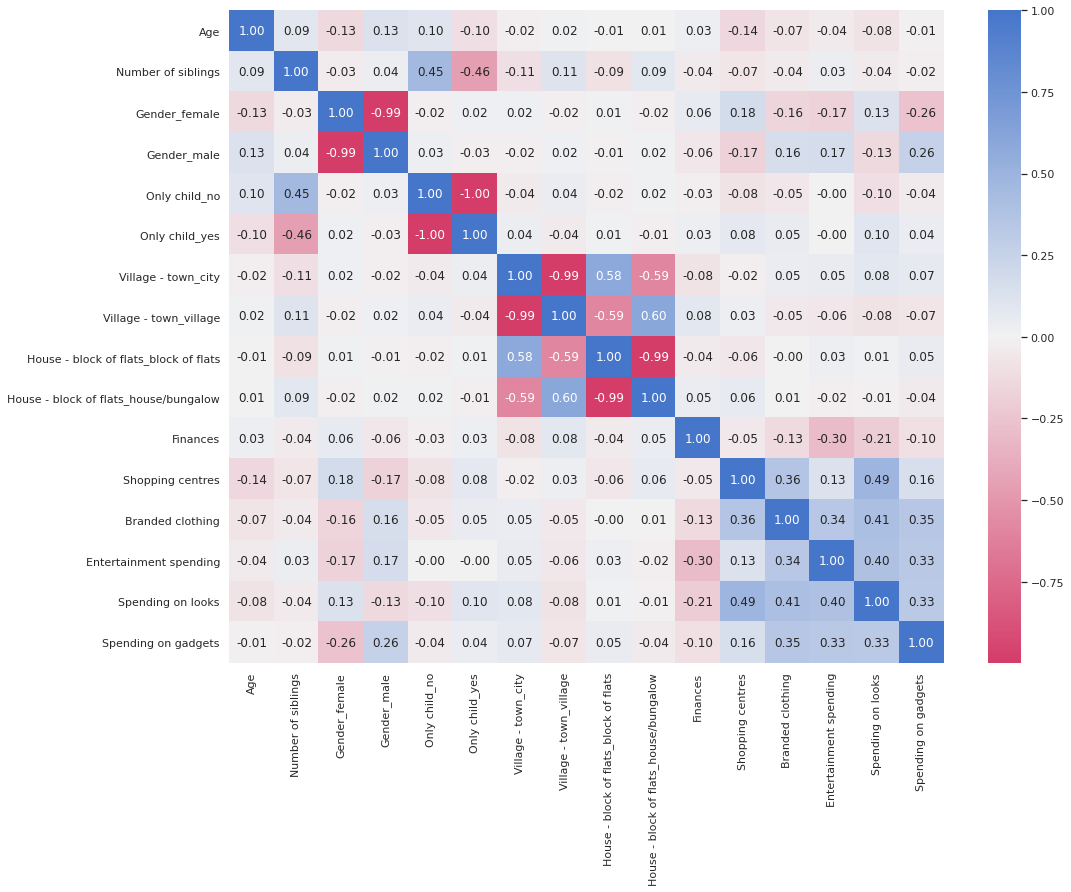

In [188]:
#plot
sns.set(rc={'figure.figsize':(16,12)})
sns.heatmap(corr1, annot=True, fmt= '.2f', center = 0.00, cmap = sns.diverging_palette(0, 255, as_cmap=True))

Phobias + smoking habits?

=============================================================

Find interesting correletion between two data subsets:

(One side: PHOBIAS)

(Another side: HEALTH HABITS) 

In [189]:
# find index of the column:
# for phobias first column is "Flying" and there are 10 items
# all ten coulmn names: Flying, Thunder lightning, Darkness, Heights, Spiders, Snakes, Rats, Ageing, Dangerous dogs, Public speaking
phobias_first_idx = df.columns.get_loc("Flying")
# get phobias 
phobias_data = df.iloc[:, phobias_first_idx : (phobias_first_idx+10)]
phobias_data.head()

,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking
0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0
1,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0
2,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0
3,2.0,1.0,1.0,3.0,5.0,5,5.0,4.0,5.0,5.0
4,1.0,2.0,1.0,1.0,1.0,1,2.0,2.0,4.0,3.0


In [190]:
# choose only most common once like: darkness, heights, spiders and fear of public speaking
phobias_data = phobias_data.iloc[:,[2,3,4,9]]
phobias_data.head()

,Darkness,Heights,Spiders,Fear of public speaking
0,1.0,1.0,1.0,2.0
1,1.0,2.0,1.0,4.0
2,1.0,1.0,1.0,2.0
3,1.0,3.0,5.0,5.0
4,1.0,1.0,1.0,3.0


In [191]:
# HEALTH HABITS are just after phobias and there are three columns
phobias_last_idx = phobias_first_idx+10
health_data = df.iloc[:, (phobias_last_idx): (phobias_last_idx + 3)]
health_data.head()

,Smoking,Alcohol,Healthy eating
0,never smoked,drink a lot,4.0
1,never smoked,drink a lot,3.0
2,tried smoking,drink a lot,3.0
3,former smoker,drink a lot,3.0
4,tried smoking,social drinker,4.0


In [192]:
phobias_alcohol_data = pd.concat([phobias_data,health_data], axis = 1)
# get rid of empty cells:
phobias_alcohol_data[phobias_alcohol_data.columns].replace('', np.nan)
phobias_alcohol_data = phobias_alcohol_data.dropna(subset=phobias_alcohol_data.columns,how='any')
print(phobias_alcohol_data.shape)
phobias_alcohol_data.head()

(988, 7)


,Darkness,Heights,Spiders,Fear of public speaking,Smoking,Alcohol,Healthy eating
0,1.0,1.0,1.0,2.0,never smoked,drink a lot,4.0
1,1.0,2.0,1.0,4.0,never smoked,drink a lot,3.0
2,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0
3,1.0,3.0,5.0,5.0,former smoker,drink a lot,3.0
4,1.0,1.0,1.0,3.0,tried smoking,social drinker,4.0


In [193]:
# get unique names in 'smoking' and 'alkohol' columns
unique_vals_smoking = phobias_alcohol_data["Smoking"].unique()
print(unique_vals_smoking)
unique_vals_alcohol = phobias_alcohol_data["Alcohol"].unique()
print(unique_vals_alcohol)

['never smoked' 'tried smoking' 'former smoker' 'current smoker']
['drink a lot' 'social drinker' 'never']


In [194]:
# convert categorical variables into numerical values
phobias_alcohol_data['Alcohol'].replace(['never', 'social drinker','drink a lot'], [1,3,5], inplace=True)
phobias_alcohol_data['Smoking'].replace(['never smoked', 'tried smoking', 'former smoker','current smoker'], [1,2,4,5],inplace=True)
phobias_alcohol_data.head()

,Darkness,Heights,Spiders,Fear of public speaking,Smoking,Alcohol,Healthy eating
0,1.0,1.0,1.0,2.0,1,5,4.0
1,1.0,2.0,1.0,4.0,1,5,3.0
2,1.0,1.0,1.0,2.0,2,5,3.0
3,1.0,3.0,5.0,5.0,4,5,3.0
4,1.0,1.0,1.0,3.0,2,3,4.0


before looking at correlation, take a look at general information. 

In [195]:
phobias_alcohol_data.describe()

,Darkness,Heights,Spiders,Fear of public speaking,Smoking,Alcohol,Healthy eating
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000
mean,2.258097,2.612348,2.835020,2.814777,2.707490,3.202429,3.028340
std,1.259286,1.294728,1.543726,1.217528,1.450453,1.152731,0.937352
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000
50%,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [196]:
corr2 = phobias_alcohol_data.corr()
corr2.head()

,Darkness,Heights,Spiders,Fear of public speaking,Smoking,Alcohol,Healthy eating
Darkness,1.000000,0.298807,0.309097,0.157427,0.077430,0.018413,-0.013070
Heights,0.298807,1.000000,0.172763,0.140152,0.053395,-0.005750,-0.007635
Spiders,0.309097,0.172763,1.000000,0.158918,0.032272,-0.057507,0.027741
Fear of public speaking,0.157427,0.140152,0.158918,1.000000,-0.045628,0.015192,-0.013151
Smoking,0.077430,0.053395,0.032272,-0.045628,1.000000,0.317833,-0.057984


<AxesSubplot:>

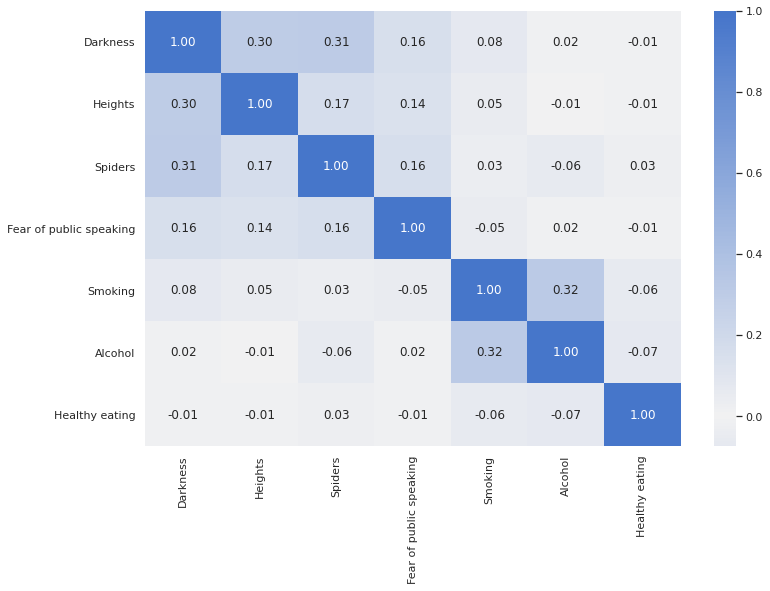

In [197]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(corr2, annot=True, fmt= '.2f', center = 0.00, cmap = sns.diverging_palette(255, 255, as_cmap=True))

/home/olga/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


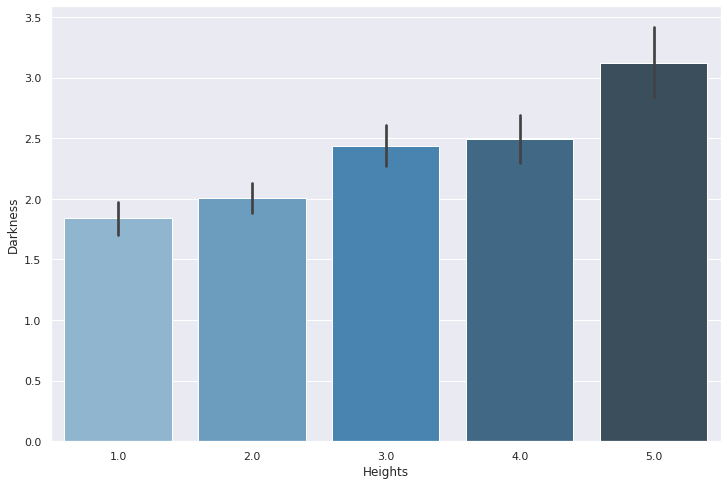

In [198]:
sns.barplot(phobias_alcohol_data['Heights'],phobias_alcohol_data['Darkness'],palette="Blues_d");

/home/olga/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


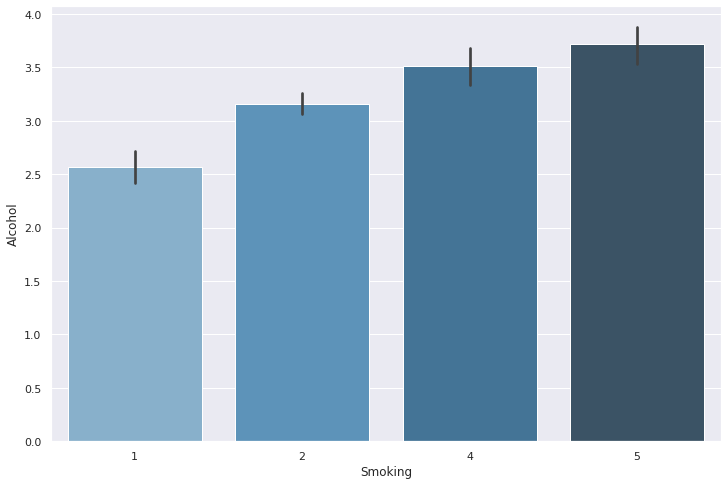

In [199]:
sns.barplot(phobias_alcohol_data['Smoking'],phobias_alcohol_data['Alcohol'],palette="Blues_d");

/home/olga/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


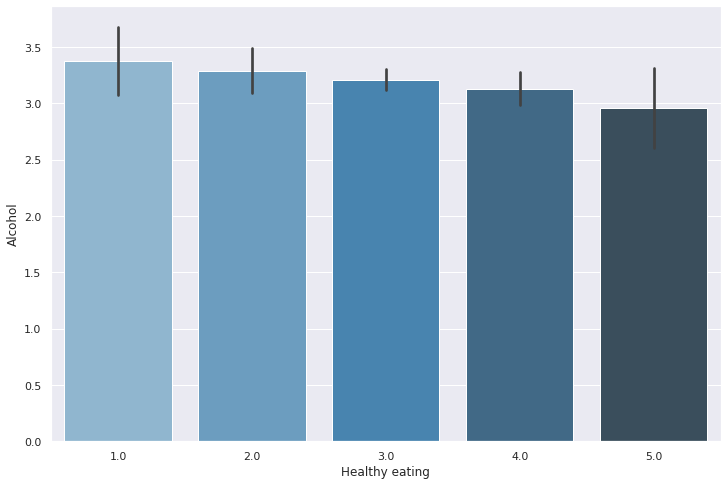

In [200]:
sns.barplot(phobias_alcohol_data['Healthy eating'],phobias_alcohol_data['Alcohol'],palette="Blues_d");

# QUESTION 2
## hypothesis testing

### Do women have different movie preferences then men?
### Do they have different interests (prefer romantic movies over action movies)?

In [201]:
# gender information: 
gender_df = df["Gender"]

# find 'movies' columns:
print(list(df.columns))
# copy relevant column names: 
# 'Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 
# 'Animated', 'Documentary', 'Western', 'Action'

# get indexes: 
movies_first_idx = df.columns.get_loc("Movies")
movies_df = df.iloc[:, movies_first_idx : (movies_first_idx+12)]

movies_vs_gender_df = pd.concat([gender_df,movies_df], axis = 1)
# get rid of empty cells:
movies_vs_gender_df[movies_vs_gender_df.columns].replace('', np.nan)
movies_vs_gender_df = movies_vs_gender_df.dropna(subset=movies_vs_gender_df.columns,how='any')

movies_vs_gender_df.head()

['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action', 'History', 'Psychology', 'Politics', 'Mathematics', 'Physics', 'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry', 'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 'Active sport', 'Gardening', 'Celebrities', 'Shopping', 'Science and technology', 'Theatre', 'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking', 'Smoking', 'Alcohol',

,Gender,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
0,female,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0
1,female,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0
2,female,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0
3,female,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0
4,female,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0


Gender: ['female' 'male']
                        male   female
Movies               4.58779  4.62326
Horror               3.06107  2.59549
Thriller             3.66158  3.18576
Comedy               4.48346  4.51215
Romantic             2.84733  3.93924
Sci-fi               3.61578  2.76736
War                  3.82443   2.6875
Fantasy/Fairy tales  3.34097  4.03472
Animated             3.50382  3.96875
Documentary          3.80916  3.53125
Western              2.62087  1.78993
Action               4.14249   3.1059


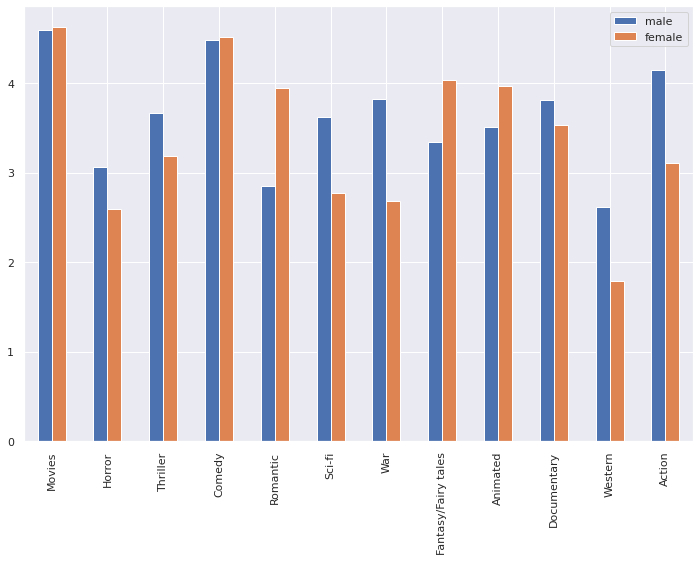

In [202]:
gender_types = movies_vs_gender_df["Gender"].unique()
print("Gender:",gender_types)

# create empty dataFrame to store mean values for each movie type and gender
female_vs_men_movies = pd.DataFrame(columns = ['male', 'female'], index=['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action'])

female_responses = movies_vs_gender_df[movies_vs_gender_df["Gender"] == "female"]
male_responses = movies_vs_gender_df[movies_vs_gender_df["Gender"] == "male"]

for col in movies_vs_gender_df.columns:
    if(col != "Gender"):
        mean_value_female = female_responses[col].mean()
        mean_value_male = male_responses[col].mean()
        female_vs_men_movies.loc[col] = pd.Series({'female':mean_value_female, 'male':mean_value_male})
print(female_vs_men_movies)

ax = female_vs_men_movies.plot.bar()

Both groups really enjoy wathing movies (5 --> max)

                    difference
Movies              -0.0354776
Horror                0.465583
Thriller              0.475814
Comedy              -0.0286922
Romantic              -1.09191
Sci-fi                0.848415
War                    1.13693
Fantasy/Fairy tales  -0.693755
Animated             -0.464933
Documentary            0.27791
Western               0.830935
Action                 1.03659


<AxesSubplot:>

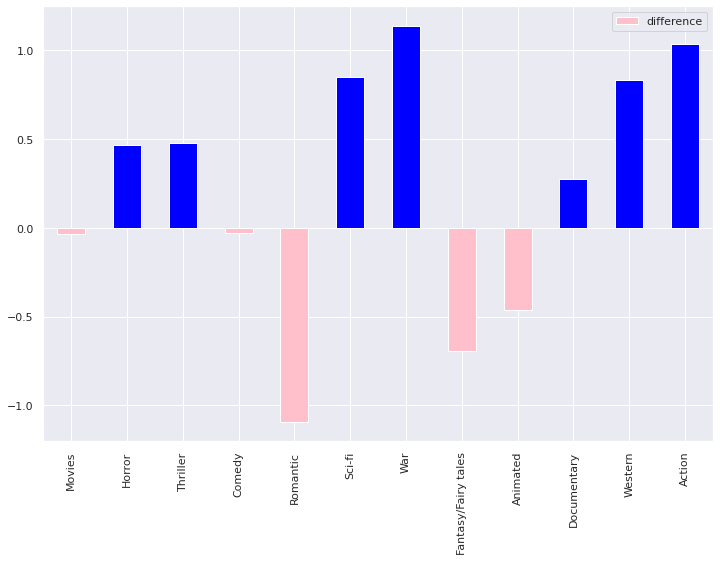

In [203]:
# check highest differences
differences_df = pd.DataFrame(columns = ['difference'], index=['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action'])

for index, row in female_vs_men_movies.iterrows():
        differences_df.loc[index] = pd.Series({'difference': (row[0] - row[1])})
print(differences_df)  

# differences_df.plot.bar()
differences_df.plot(kind='bar', color = [np.where(differences_df.difference > 0, 'blue', 'pink')])

# QUESTION 3
## clustering analysis

## Given the movies preferences, do people make up any clusters of similar choices?

<AxesSubplot:>

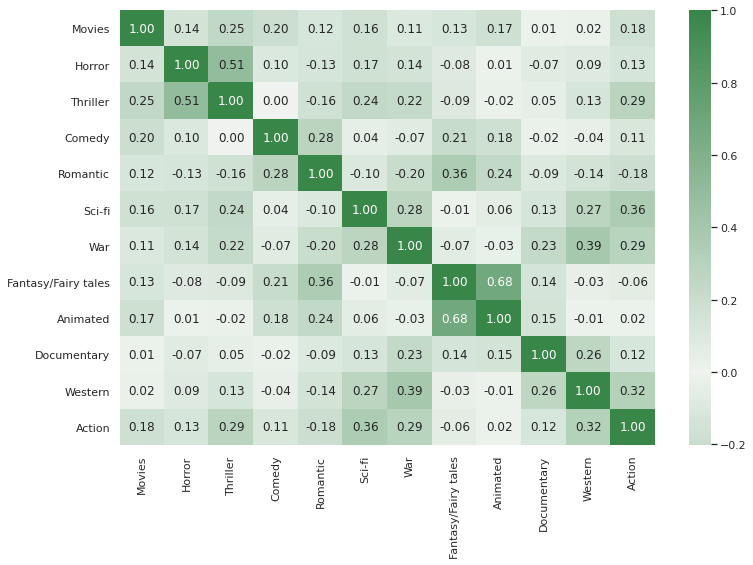

In [204]:
# stay with movie preferences
corr3 = movies_vs_gender_df.corr()
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(corr3, annot=True, fmt= '.2f', center = 0.00, cmap = sns.diverging_palette(133, 133, as_cmap=True))

In [205]:
from sklearn.cluster import KMeans

movies_df = movies_vs_gender_df[movies_vs_gender_df.columns[1:13]]
#check whether data are consistant (scaled, as it's important for kmeans)
movies_df.head()


,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0
1,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0
2,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0
3,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0
4,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0


In [206]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 1000, n_init = 30)
km.fit(movies_df)
clasters = km.predict(movies_df)
# movies_df['clasters'] = km.labels_
movies_df['clasters'] = clasters
new = movies_df.groupby('clasters').mean()
new.head()

,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
clasters,,,,,,,,,,,,
0,4.752688,3.919355,3.908602,4.752688,3.887097,2.505376,2.209677,4.069892,4.037634,2.951613,1.500000,2.919355
1,4.782918,3.395018,4.056940,4.644128,3.281139,4.213523,4.213523,4.046263,4.249110,4.149466,2.804270,4.366548
2,4.413043,2.656522,3.352174,4.052174,2.769565,3.021739,3.300000,2.356522,2.304348,3.508696,2.252174,3.586957
3,4.496324,1.485294,2.338235,4.558824,4.066176,2.463235,2.562500,4.415441,4.367647,3.709559,1.750000,3.022059


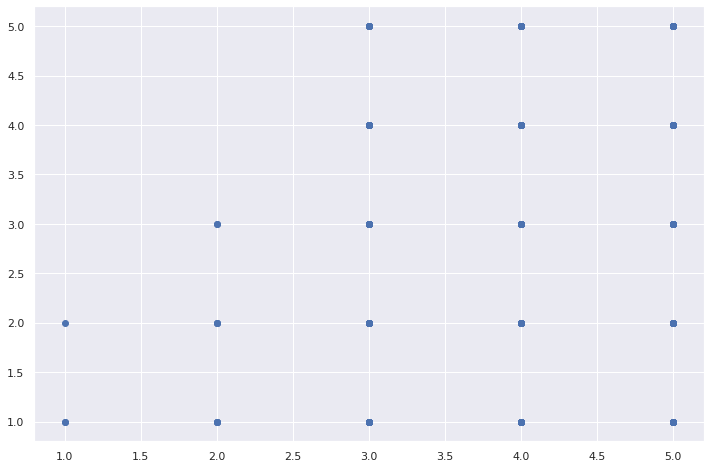

In [217]:
# plt.scatter(movies_df['Movies'], movies_df['Horror'], colormap='gist_rainbow')
plt.scatter(movies_df['Movies'], movies_df['Horror'])
# movies_df['Horror']

# # print(movies_df.shape, y_means.shape)
# n = 1000
# d = pd.DataFrame({
#         'x': np.random.randint(0,100,n),
#         'y': np.random.randint(0,100,n),
#     })

# m = KMeans(5)
# m.fit(d)

# d['cl'] = m.labels_
# d.plot.scatter('x', 'y', c='cl', colormap='gist_rainbow')
